### Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model,save_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
def define_model(width, height):
    input_tensor = Input(shape=(224, 224, 3))
    base_model = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])
    return model

In [ ]:
nb_epoch     = 30
batch_size   = 32
width        = 224
height       = 224

In [3]:
def define_generators():
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rotation_range=10,
#     vertical_flip = True,
#     horizontal_flip=True,
#     fill_mode='nearest',
    validation_split=0.0
    )

    train_generator = train_datagen.flow_from_directory(
        directory= r"Dataset_kneeKL299\train",
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        directory= r"Dataset_kneeKL299\val",
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
class_mode="categorical",
        subset='validation'
    )

    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    test_generator = test_datagen.flow_from_directory(
        directory= r"Dataset_kneeKL299",
        target_size=(width, height),
        color_mode='rgb',
        shuffle=False,
        class_mode='categorical')

    return train_generator, validation_generator, test_generator

In [5]:
model = define_model(width, height)
model.summary()
train_generator, validation_generator, test_generator = define_generators()


model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_generator,
    epochs=nb_epoch
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                        

C:\Users\ADMIN\anaconda3\envs\tf_new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
181/181 [==============================] - 46s 177ms/step - loss: 2.1147 - accuracy: 0.2676
Epoch 2/30
181/181 [==============================] - 34s 186ms/step - loss: 1.7664 - accuracy: 0.3517
Epoch 3/30
181/181 [==============================] - 35s 191ms/step - loss: 1.5904 - accuracy: 0.4067
Epoch 4/30
181/181 [==============================] - 37s 201ms/step - loss: 1.5100 - accuracy: 0.4375
Epoch 5/30
181/181 [==============================] - 36s 199ms/step - loss: 1.4108 - accuracy: 0.4637
Epoch 6/30
181/181 [==============================] - 37s 202ms/step - loss: 1.3449 - accuracy: 0.4884
Epoch 7/30
181/181 [==============================] - 37s 206ms/step - loss: 1.2984 - accuracy: 0.5064
Epoch 8/30
181/181 [==============================] - 38s 209ms/step - loss: 1.2723 - accuracy: 0.5064
Epoch 9/30
181/181 [==============================] - 38s 212ms/step - loss: 1.2162 - accuracy: 0.5254
Epoch 10/30
181/181 [==============================] - 39s 214ms/step - l

In [6]:
model.evaluate(test_generator)

52/52 [==============================] - 15s 182ms/step - loss: 1.1632 - accuracy: 0.5471


[1.1632053852081299, 0.5471014380455017]

In [7]:
save_model(model, "DenseNet201.h5")

In [8]:
model = load_model('DenseNet201.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(
    train_generator,
    epochs=30
)

Epoch 1/30
181/181 [==============================] - 46s 168ms/step - loss: 0.7585 - accuracy: 0.6966
Epoch 2/30
181/181 [==============================] - 34s 188ms/step - loss: 0.7259 - accuracy: 0.7160
Epoch 3/30
181/181 [==============================] - 39s 214ms/step - loss: 0.7273 - accuracy: 0.7066
Epoch 4/30
181/181 [==============================] - 36s 197ms/step - loss: 0.7095 - accuracy: 0.7195
Epoch 5/30
181/181 [==============================] - 44s 243ms/step - loss: 0.6762 - accuracy: 0.7345
Epoch 6/30
181/181 [==============================] - 49s 270ms/step - loss: 0.6831 - accuracy: 0.7331
Epoch 7/30
181/181 [==============================] - 57s 317ms/step - loss: 0.6485 - accuracy: 0.7435
Epoch 8/30
181/181 [==============================] - 59s 327ms/step - loss: 0.6464 - accuracy: 0.7442
Epoch 9/30
181/181 [==============================] - 59s 327ms/step - loss: 0.6280 - accuracy: 0.7482
Epoch 10/30
181/181 [==============================] - 50s 274ms/step - l

In [11]:
train_generator, validation_generator, test_generator = define_generators()
model = load_model('model_v1_ALL_new.h5')
model.evaluate(test_generator)

Found 5778 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
52/52 [==============================] - 13s 162ms/step - loss: 1.4975 - accuracy: 0.5157


[1.497456431388855, 0.5157004594802856]

In [10]:
save_model(model, "DenseNet201.h5")

In [13]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------------- ----------------------- 61.4/162.8 kB 656.4 kB/s eta 0:00:01
     ---------------------------- --------- 122.9/162.8 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.1 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB 6.8 MB/s eta 0:00:02
   - -------------------------------------- 0.2/7.7 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.7 MB 4.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 4.1 MB/s eta 0:00:02
   --- -----------------------------

In [17]:
!pip install -U scikit-learn

  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.0/10.6 MB 393.8 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.6 MB 744.7 kB/s eta 0:00:15
    --------------------------------------- 0.1/10.6 MB 853.3 kB/s eta 0:00:13
    --------------------------------------- 0.2/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/10.6 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 1.8 MB/s eta 0:00:06
   -- ---------------------

In [1]:
import os
import timeit

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.utils.class_weight import compute_class_weight

In [2]:
np.random.seed(12049)

In [3]:
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model


def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

1/1 [==============================] - 8s 8s/step


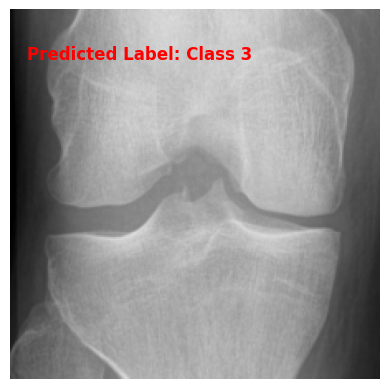

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the trained model
model = load_model('model_v1_ALL_new.h5')

# Define the target image size expected by the model
target_size = (224, 224)

def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_class(image_path, model, target_size):
    # Preprocess the image
    processed_image = preprocess_image(image_path, target_size)
    
    # Generate prediction
    prediction = model.predict(processed_image)
    
    # Get the predicted class index and its corresponding label
    predicted_class_index = np.argmax(prediction)
    class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']  # Update with your actual class labels
    
    predicted_label = class_labels[predicted_class_index]
    
    return predicted_label

# Example usage:
user_image_path = r"E:\SEM 6\DL\Data\right\9003406R.png"
predicted_label = predict_image_class(user_image_path, model, target_size)

# Load the image for visualization
img = image.load_img(user_image_path)
img_array = image.img_to_array(img)

# Plot the image
plt.imshow(img_array.astype(np.uint8))

# Display the predicted label as text
plt.text(10, 30, f'Predicted Label: {predicted_label}', fontsize=12, color='red', weight='bold')
plt.axis('off')  # Turn off axis
plt.show()


In [6]:
# List all layers in the model
for layer in model.layers:
    print(layer.name)


densenet201
global_average_pooling2d
batch_normalization
dense
batch_normalization_1
dropout
dense_1
batch_normalization_2
dropout_1
dense_2
